<a href="https://colab.research.google.com/github/GyanendraChaubey/Python-Tutorials/blob/main/Python_Programming_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem1: Several media reports have demonstrated that income inequality has increased in the US
during this last decade. Here we will look at global data. Use exploratory data analysis to determine if
the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or
stayed the same during the last two decades.
Data: Gapminder is a great resource that contains over 500 data sets related to world
indicators such as income, GDP and life expectancy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Using the list of countries by continent from World Atlas data, load in
the countries.csv file into a pandas DataFrame and name this data set
as countries. This data set has been shared with you.

In [ ]:
countries=pd.read_csv('/content/drive/MyDrive/countries.csv')

In [ ]:
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [ ]:
countries.shape

(194, 2)

2. Using the data available on Gapminder, load in the Income per person (GDP/capita,
PPP$ inflation-adjusted) as a pandas DataFrame and name this data set as income.


In [ ]:
income=pd.read_csv('/content/drive/MyDrive/income_per_person_gdppercapita_ppp_inflation_adjusted.csv',header=None)

Transform the income dataFrame to have years as the rows and countries as the
columns. Show the head of this data set when it is loaded.

In [ ]:
income.head()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
2,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
3,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
4,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k


In [ ]:
income[0][0]=''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
income.head()

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
2,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
3,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
4,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k


In [ ]:
income.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
247    0
248    0
249    0
250    0
251    0
Length: 252, dtype: int64

In [ ]:
income.T

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1,1800,683,700,755,1360,1130,1730,582,857,925,...,568,949,1250,976,662,1590,993,1780,751,984
2,1801,683,702,755,1360,1130,1730,582,857,930,...,568,949,1240,976,663,1590,995,1760,753,985
3,1802,683,705,755,1360,1140,1740,582,857,936,...,568,949,1240,976,663,1590,998,1740,755,986
4,1803,683,709,755,1360,1140,1740,582,857,941,...,568,949,1230,976,663,1590,1000,1720,756,987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2046,2990,8900,27.9k,76.6k,112k,33.9k,27.5k,29.4k,80.1k,...,14.4k,22.3k,1900,20.3k,3710,9860,4170,18.1k,5220,5440
248,2047,3060,9090,28.5k,78.3k,114k,34.7k,28.1k,30k,81.8k,...,14.8k,22.7k,1940,20.8k,3790,10.1k,4260,18.5k,5330,5560
249,2048,3120,9280,29.1k,80k,117k,35.4k,28.7k,30.7k,83.5k,...,15.1k,23.2k,1980,21.2k,3870,10.3k,4350,18.8k,5440,5670
250,2049,3190,9480,29.7k,81.7k,119k,36.2k,29.3k,31.3k,85.3k,...,15.4k,23.7k,2020,21.7k,3950,10.5k,4440,19.3k,5560,5800


In [ ]:
 income=income.T.set_index(0)
 income

,1,2,3,4,5,6,7,8,9,10,...,186,187,188,189,190,191,192,193,194,195
0,,,,,,,,,,,,,,,,,,,,,
,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1800,683,700,755,1360,1130,1730,582,857,925,2090,...,568,949,1250,976,662,1590,993,1780,751,984
1801,683,702,755,1360,1130,1730,582,857,930,2100,...,568,949,1240,976,663,1590,995,1760,753,985
1802,683,705,755,1360,1140,1740,582,857,936,2110,...,568,949,1240,976,663,1590,998,1740,755,986
1803,683,709,755,1360,1140,1740,582,857,941,2120,...,568,949,1230,976,663,1590,1000,1720,756,987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2990,8900,27.9k,76.6k,112k,33.9k,27.5k,29.4k,80.1k,86.6k,...,14.4k,22.3k,1900,20.3k,3710,9860,4170,18.1k,5220,5440
2047,3060,9090,28.5k,78.3k,114k,34.7k,28.1k,30k,81.8k,88.4k,...,14.8k,22.7k,1940,20.8k,3790,10.1k,4260,18.5k,5330,5560
2048,3120,9280,29.1k,80k,117k,35.4k,28.7k,30.7k,83.5k,90.3k,...,15.1k,23.2k,1980,21.2k,3870,10.3k,4350,18.8k,5440,5670


In [ ]:
new_header = income.iloc[0] #grab the first row for the header
income = income[1:] #take the data less the header row
income.columns = new_header #set the header row as the df header

In [ ]:
income.head()

,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,,,,,,,,,,,,,,,,,,,,,
1800,683,700,755,1360,1130,1730,582,857,925,2090,...,568,949,1250,976,662,1590,993,1780,751,984
1801,683,702,755,1360,1130,1730,582,857,930,2100,...,568,949,1240,976,663,1590,995,1760,753,985
1802,683,705,755,1360,1140,1740,582,857,936,2110,...,568,949,1240,976,663,1590,998,1740,755,986
1803,683,709,755,1360,1140,1740,582,857,941,2120,...,568,949,1230,976,663,1590,1000,1720,756,987
1804,683,711,755,1370,1150,1750,582,857,947,2130,...,569,949,1220,976,663,1590,1000,1700,758,988


4. Graphically display the distribution of income per person across all countries in the
world for any given year (e.g. 2000). What kind of plot would be best?

In [ ]:
columns=list(income.iloc[200:201].columns)

In [ ]:
income.iloc[200:201,:]

,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,,,,,,,,,,,,,,,,,,,,,
2000,584,2340,5890,35.8k,71.6k,18.6k,4050,18.3k,38.2k,46.5k,...,2970,8650,16.3k,2960,3070,4810,4900,11k,1990,4350


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 1800 to 2050
Columns: 195 entries, Afghanistan to Zimbabwe
dtypes: object(195)
memory usage: 384.3+ KB


In [ ]:
value=[]
for i in range(200,201):
  for j in range(195):
    try:
      income.iloc[i][j]=int(income.iloc[i][j])
      value.append(int(income.iloc[i][j]))
    except:
      #print(type(income.iloc[i][j]))
      #print(income.iloc[i][j])
      #print(income.iloc[i][j][:-1])
      value.append(float(income.iloc[i][j][:-1])*1000)
      #print(income.iloc[i][j])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [ ]:
value

[584,
 2340,
 5890,
 35800.0,
 71600.0,
 18600.0,
 4050,
 18300.0,
 38200.0,
 46500.0,
 4000,
 828,
 43000.0,
 2480,
 1300,
 1940,
 10500.0,
 49400.0,
 40600.0,
 7610,
 8050,
 6600,
 5420,
 11600.0,
 15100.0,
 69000.0,
 4060,
 10600.0,
 1040,
 37200.0,
 59400.0,
 15600.0,
 3450,
 2740,
 2860,
 752,
 4400,
 9040,
 2830,
 4070,
 12600.0,
 4660,
 32900.0,
 25000.0,
 42900.0,
 2520,
 9610,
 48900.0,
 9320,
 8710,
 8180,
 7750,
 2810,
 34800.0,
 17800.0,
 728,
 39900.0,
 9580,
 39700.0,
 3430,
 16600.0,
 38900.0,
 4920,
 2810,
 1710,
 2270,
 1720,
 11700.0,
 29100.0,
 11600.0,
 6500,
 7780,
 36300.0,
 4110,
 18400.0,
 2940,
 19400.0,
 5690,
 2580,
 48000.0,
 10100.0,
 4240,
 41500.0,
 29900.0,
 43100.0,
 9350,
 8740,
 36300.0,
 10300.0,
 3190,
 3080,
 1930,
 2180,
 20100.0,
 23000.0,
 55000.0,
 2860,
 14400.0,
 1750,
 16700.0,
 13000.0,
 5950,
 1690,
 13800.0,
 99300.0,
 13000.0,
 4370,
 56800.0,
 5070,
 1610,
 13400.0,
 17800.0,
 3340,
 10200.0,
 1630,
 27500.0,
 949,
 12400.0,
 3410,
 631

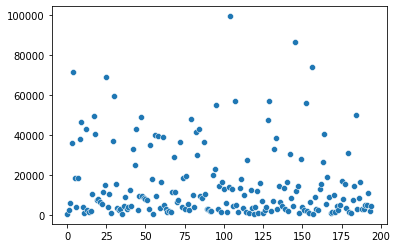

In [ ]:
sns.scatterplot(y=value,x=range(195))

5. Graphically display the log distribution of income per person across all countries in the
world for any given year (e.g. 2000). What kind of plot would be best?

In [ ]:
from scipy import log
log_value=log(value)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  


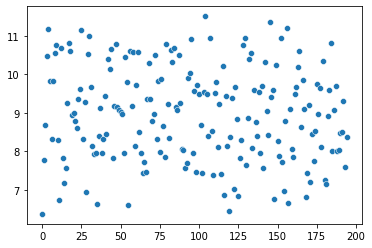

In [ ]:
sns.scatterplot(y=log_value,x=range(195))

6. Write a function to merge the countries and income data sets for any given year.

In [ ]:
def merge(country,value):
  df={}
  for i in country:
    for j in value:
      df[i]=j
  return df

In [ ]:
country=list(countries['Country'])
df=merge(country,value)
df=pd.DataFrame(df,index=[0])
df.T

,0
Algeria,4350
Angola,4350
Benin,4350
Botswana,4350
Burkina,4350
...,...
Paraguay,4350
Peru,4350
Suriname,4350
Uruguay,4350


7. Use exploratory data analysis tools such as histograms and boxplots to explore the
distribution of the income per person by region data set from above question for a given
year. Describe how these change through the recent years?

In [ ]:
countries['Region'].value_counts()

AFRICA           54
EUROPE           47
ASIA             44
NORTH AMERICA    23
OCEANIA          14
SOUTH AMERICA    12
Name: Region, dtype: int64

In [ ]:
countries['income_per_person']=value[:-1]

In [ ]:
countries.head()

,Country,Region,income_per_person
0,Algeria,AFRICA,584.0
1,Angola,AFRICA,2340.0
2,Benin,AFRICA,5890.0
3,Botswana,AFRICA,35800.0
4,Burkina,AFRICA,71600.0


In [ ]:
group=countries.groupby(['Region']).sum()
group.iloc[:,0:1]

,income_per_person
Region,
AFRICA,927994.0
ASIA,703438.0
EUROPE,663653.0
NORTH AMERICA,433168.0
OCEANIA,102957.0
SOUTH AMERICA,128750.0


In [ ]:
group['income_per_person']

Region
AFRICA           927994.0
ASIA             703438.0
EUROPE           663653.0
NORTH AMERICA    433168.0
OCEANIA          102957.0
SOUTH AMERICA    128750.0
Name: income_per_person, dtype: float64

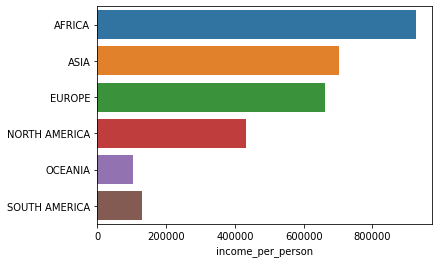

In [ ]:
sns.barplot(x=group['income_per_person'],y=['AFRICA','ASIA','EUROPE','NORTH AMERICA','OCEANIA','SOUTH AMERICA'])

Problem 2: Sabermetrics
You will use data from before 2002 in the Sean Lahman's Baseball Database to create a metric for
picking baseball players using linear regression. This is same database we used in Homework 1. This
database contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding
statistics, standings, team stats, managerial records, post-season data, and more". Documentation
provided here.
In this problem we will be using to the Sean Lahman's Baseball Database. From this database, we
will be extracting five data sets containing information such as yearly stats and standing, batting
statistics, fielding statistics, player names, player salaries and biographical information. You will
explore the data in this database from before 2002 and create a metric for picking players.

1. Load in these CSV files from the Sean Lahman's Baseball Database. For this assignment, we
will use the 'Teams.csv', 'Batting.csv', 'Salaries.csv', 'Fielding.csv', 'Master.csv' tables. Read
these tables into separate pandas DataFrames with the following names.

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=14514fb5ce42aba93ee9e1ccb619e8a2d1fa0e05210ecf209860a74308b28e24
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget
wget.download('https://www.seanlahman.com/files/database/lahman-csv_2014-02-14.zip')

'lahman-csv_2014-02-14.zip'

In [ ]:
import zipfile

with zipfile.ZipFile('/content/lahman-csv_2014-02-14.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

2. Create pandas DataFrames for each of the five data sets.

In [ ]:
teams=pd.read_csv('/content/Teams.csv')
batting=pd.read_csv('/content/Batting.csv')
salaries=pd.read_csv('/content/Salaries.csv')
fielding=pd.read_csv('/content/Fielding.csv')
master=pd.read_csv('/content/Master.csv')

3. Print the dimensions (i.e. number of rows and columns) for each of the DataFrames.

In [ ]:
print(teams.shape)
print(batting.shape)
print(salaries.shape)
print(fielding.shape)
print(master.shape)

(2745, 48)
(97889, 24)
(23956, 5)
(166991, 18)
(18354, 24)


4. Calculate the median salary for each player and create a pandas DataFrame
called medianSalaries with four columns: (1) the player ID, (2) the first name of the player,
(3) the last name of the player and (4) the median salary of the player. Show the head of
the medianSalaries DataFrame.

In [ ]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [ ]:
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [ ]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
fielding.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,ansonca01,1871,1,RC1,NaN,1B,1,NaN,NaN,7.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,biermch01,1871,1,FW1,NaN,1B,1,NaN,NaN,9.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,carleji01,1871,1,CL1,NaN,1B,29,NaN,NaN,295.0,4.0,34.0,10.0,NaN,NaN,NaN,NaN,NaN
3,connone01,1871,1,TRO,NaN,1B,4,NaN,NaN,35.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN
4,cravebi01,1871,1,TRO,NaN,1B,2,NaN,NaN,18.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
master.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,205.0,75.0,R,R,2004-04-06,2013-09-28,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [ ]:
df1=master[['playerID','nameFirst','nameLast']]
df1

,playerID,nameFirst,nameLast
0,aardsda01,David,Aardsma
1,aaronha01,Hank,Aaron
2,aaronto01,Tommie,Aaron
3,aasedo01,Don,Aase
4,abadan01,Andy,Abad
...,...,...,...
18349,zupcibo01,Bob,Zupcic
18350,zupofr01,Frank,Zupo
18351,zuvelpa01,Paul,Zuvella
18352,zuverge01,George,Zuverink


In [ ]:
salaries.drop(['yearID'],axis=1).groupby(salaries['playerID']).median()

,salary
playerID,
aardsda01,419000.0
aasedo01,612500.0
abadan01,327000.0
abadfe01,451500.0
abbotje01,255000.0
...,...
zuberjo01,109000.0
zuletju01,200000.0
zumayjo01,577500.0


5. consider only team/season combinations in which the teams played 162 Games. Exclude all
data from before 1947. Compute the per plate appearance rates for doubles, triples,
HR, and BB. Create a new pandas DataFrame called stats that has the teamID, yearID, wins
and these rates.

In [ ]:
stats=teams.loc[:,['yearID','teamID','W','2B','3B','HR','BB']]
stats=stats[stats['yearID']>1947]

In [ ]:
stats

,yearID,teamID,W,2B,3B,HR,BB
1151,1948,CLE,97,242,54,155,646
1152,1948,BOS,96,277,40,121,823
1153,1948,NYA,94,251,75,139,623
1154,1948,PHA,84,231,47,68,726
1155,1948,DET,78,219,58,78,671
...,...,...,...,...,...,...,...
2740,2013,LAN,92,281,17,138,476
2741,2013,ARI,81,302,31,130,519
2742,2013,SDN,76,246,26,146,467
2743,2013,SFN,76,280,35,107,469


6. Is there a noticeable time trend in the rates computed computed in above question?

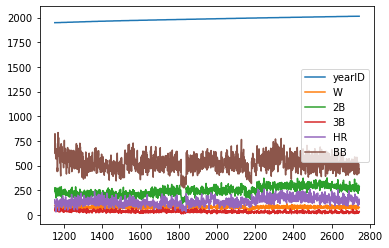

In [ ]:
x=stats.drop(['teamID'],axis=1)
x.plot()

7. Using the stats DataFrame ,adjust the singles per PA rates so that the average across teams
for each year is 0. Do the same for the doubles, triples, HR, and BB rates.

In [ ]:
#Not understanding what is singles per PA

8. define a function to mean normalize the rates.

In [ ]:
import statistics as stats
import numpy as np
def mean_normalize(x):
  xnew=[]
  mean=np.mean(x)
  std=stats.std(x)
  for i in x:
    xnew=i-mean/std
  return xnew

9. subset the players DataFrame for players with at least 500 plate appearances and for years
after 1947

In [ ]:
#I am not able to get file with players

10. Use same function defined in question 8 to mean normalize across teams for each year

In [ ]:
#which column we need to normalize that is not clear

11. create a function called meanNormalizePlayerLS that computes the lifetime average for
each of the quantities (singles, doubles, triples, HR, BB). Then we will construct a function
called getyear that extracts the year from a date as saved in the master table.

In [ ]:
def getyear(data):
  start_year=[]
  for i in range(len(data)):
    if type(data[i])=='str':
      start_year.append(data[i][0:4])
  else:
    start_year.append(str(data[i])[0:4])

12. use groupby (by playerID) on the playerstats DataFrame to compute the average lifetime
statistics (1B, 2B, 3B, HR and BB) for each player.

In [ ]:
stats.groupby(stats['2B']).mean()

,yearID,W,3B,HR,BB
2B,,,,,
119,1981.0,64.0,26.0,104.0,342.0
133,1981.0,63.0,20.0,82.0,331.0
134,1981.0,51.0,16.0,97.0,393.0
135,1981.0,54.0,27.0,76.0,322.0
136,1981.0,41.0,35.0,57.0,304.0
...,...,...,...,...,...
358,2010.0,89.0,22.0,211.0,587.0
363,2013.0,97.0,29.0,178.0,581.0
371,2003.0,95.0,40.0,238.0,620.0


In [ ]:
stats.groupby(stats['3B']).mean()

,yearID,W,2B,HR,BB
3B,,,,,
11,1989.500000,69.000000,234.000000,151.000000,498.500000
12,1998.666667,89.333333,292.333333,196.000000,614.000000
13,2000.666667,72.000000,256.777778,171.222222,505.888889
14,2000.000000,88.000000,293.600000,193.000000,574.600000
15,2000.750000,71.750000,283.500000,152.750000,511.750000
...,...,...,...,...,...
69,1954.000000,66.000000,188.000000,81.000000,610.000000
70,1960.000000,93.500000,234.500000,144.500000,565.500000
75,1948.000000,75.000000,227.000000,85.000000,595.500000


In [ ]:
stats.groupby(stats['HR']).mean()

,yearID,W,2B,3B,BB
HR,,,,,
31,1948.0,56.0,203.0,75.0,568.0
32,1981.0,41.0,170.0,35.0,311.0
39,1981.0,52.0,150.0,21.0,343.0
43,1949.0,63.0,207.0,66.0,702.0
45,1981.0,61.0,160.0,35.0,340.0
...,...,...,...,...,...
246,2001.0,73.0,326.0,23.0,548.0
249,2000.0,72.0,289.0,36.0,673.0
257,2003.0,86.5,309.0,25.0,558.0


In [ ]:
stats.groupby(stats['BB']).mean()

,yearID,W,2B,3B,HR
BB,,,,,
275,1981.0,41.0,147.0,36.0,47.0
278,1981.0,46.0,176.0,30.0,55.0
284,1981.0,37.0,137.0,23.0,61.0
295,1981.0,57.0,178.0,15.0,49.0
300,1981.0,62.0,173.0,20.0,96.0
...,...,...,...,...,...
770,1999.0,87.0,287.0,20.0,235.0
775,2000.0,91.0,300.0,26.0,198.0
783,1949.0,81.0,214.0,49.0,82.0


13. merge playerLS with the master DataFrame which contains the career start and end.

In [ ]:
#what is playerLS at here?

14. Finally, extract the year from the debut and finalGame column to determine what year each
player started and ended their career.

In [ ]:
start_year=[]
for i in range(len(master)):
  if type(master['debut'][i])=='str':
    print(master['debut'][i][0:4])
    start_year.append(master['debut'][i][0:4])
  else:
    start_year.append(str(master['debut'][i])[0:4])

In [ ]:
end_year=[]
for i in range(len(master)):
  if type(master['finalGame'][i])=='str':
    print(master['finalGame'][i][0:4])
    end_year.append(master['finalGame'][i][0:4])
  else:
    end_year.append(str(master['finalGame'][i])[0:4])

In [ ]:
df2=pd.DataFrame({
    'start_year':start_year,
    'end_year':end_year
})

In [ ]:
df2

,start_year,end_year
0,2004,2013
1,1954,1976
2,1962,1971
3,1977,1990
4,2001,2006
...,...,...
18349,1991,1994
18350,1957,1961
18351,1982,1991
18352,1951,1959
